In [9]:
import pymc as pm
from mc import *
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import arviz as az

In [10]:
%load_ext watermark
az.style.use("arviz-darkgrid")

In [17]:
out_path = f'out/dy_free'
os.makedirs(out_path, exist_ok=True)

src = load_objectives(
    path_data='data/pars.json', 
    path_target='data/targets.json'
)

In [6]:
model = src.build_model()

In [7]:
with model:
    fit = pm.sample_smc(draws=500, chains=3)
    ppost = pm.sample_posterior_predictive(fit)

Initializing SMC sampler...
Sampling 2 chains in 2 jobs


/opt/conda/envs/pymc-dev/lib/python3.10/site-packages/pymc/smc/sample_smc.py:248: UserWarning: The number of samples is too small to check convergence reliably.
  _compute_convergence_checks(idata, draws, model, trace)


In [13]:
az.summary(fit, kind="stats")

,mean,sd,hdi_3%,hdi_97%
p_comorb,0.366,0.028,0.326,0.412
rr_risk_comorb,11.339,1.718,9.094,13.990
beta_ds,9.317,1.328,7.606,11.135
rr_beta_dr,0.995,0.045,0.948,1.058
rr_inf_asym,0.633,0.105,0.480,0.783
rr_inf_sn,0.206,0.036,0.165,0.250
red_sus,0.195,0.006,0.187,0.203
rr_sus_ltbi,0.212,0.006,0.203,0.222
r_relapse_td,0.142,0.006,0.133,0.150
r_relapse_tc,0.030,0.001,0.029,0.031


array([[<AxesSubplot:title={'center':'p_comorb'}>,
        <AxesSubplot:title={'center':'p_comorb'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'rr_risk_comorb'}>,
        <AxesSubplot:title={'center':'rr_risk_comorb'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'beta_ds'}>,
        <AxesSubplot:title={'center':'beta_ds'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'rr_beta_dr'}>,
        <AxesSubplot:title={'center':'rr_beta_dr'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'rr_inf_asym'}>,
        <AxesSubplot:title={'center':'rr_inf_asym'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'rr_inf_sn'}>,
        <AxesSubplot:title={'center':'rr_inf_sn'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'red_sus'}>,
        <AxesSubplot:title={'center':'red_sus'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'rr_sus_ltbi'}>,
        <

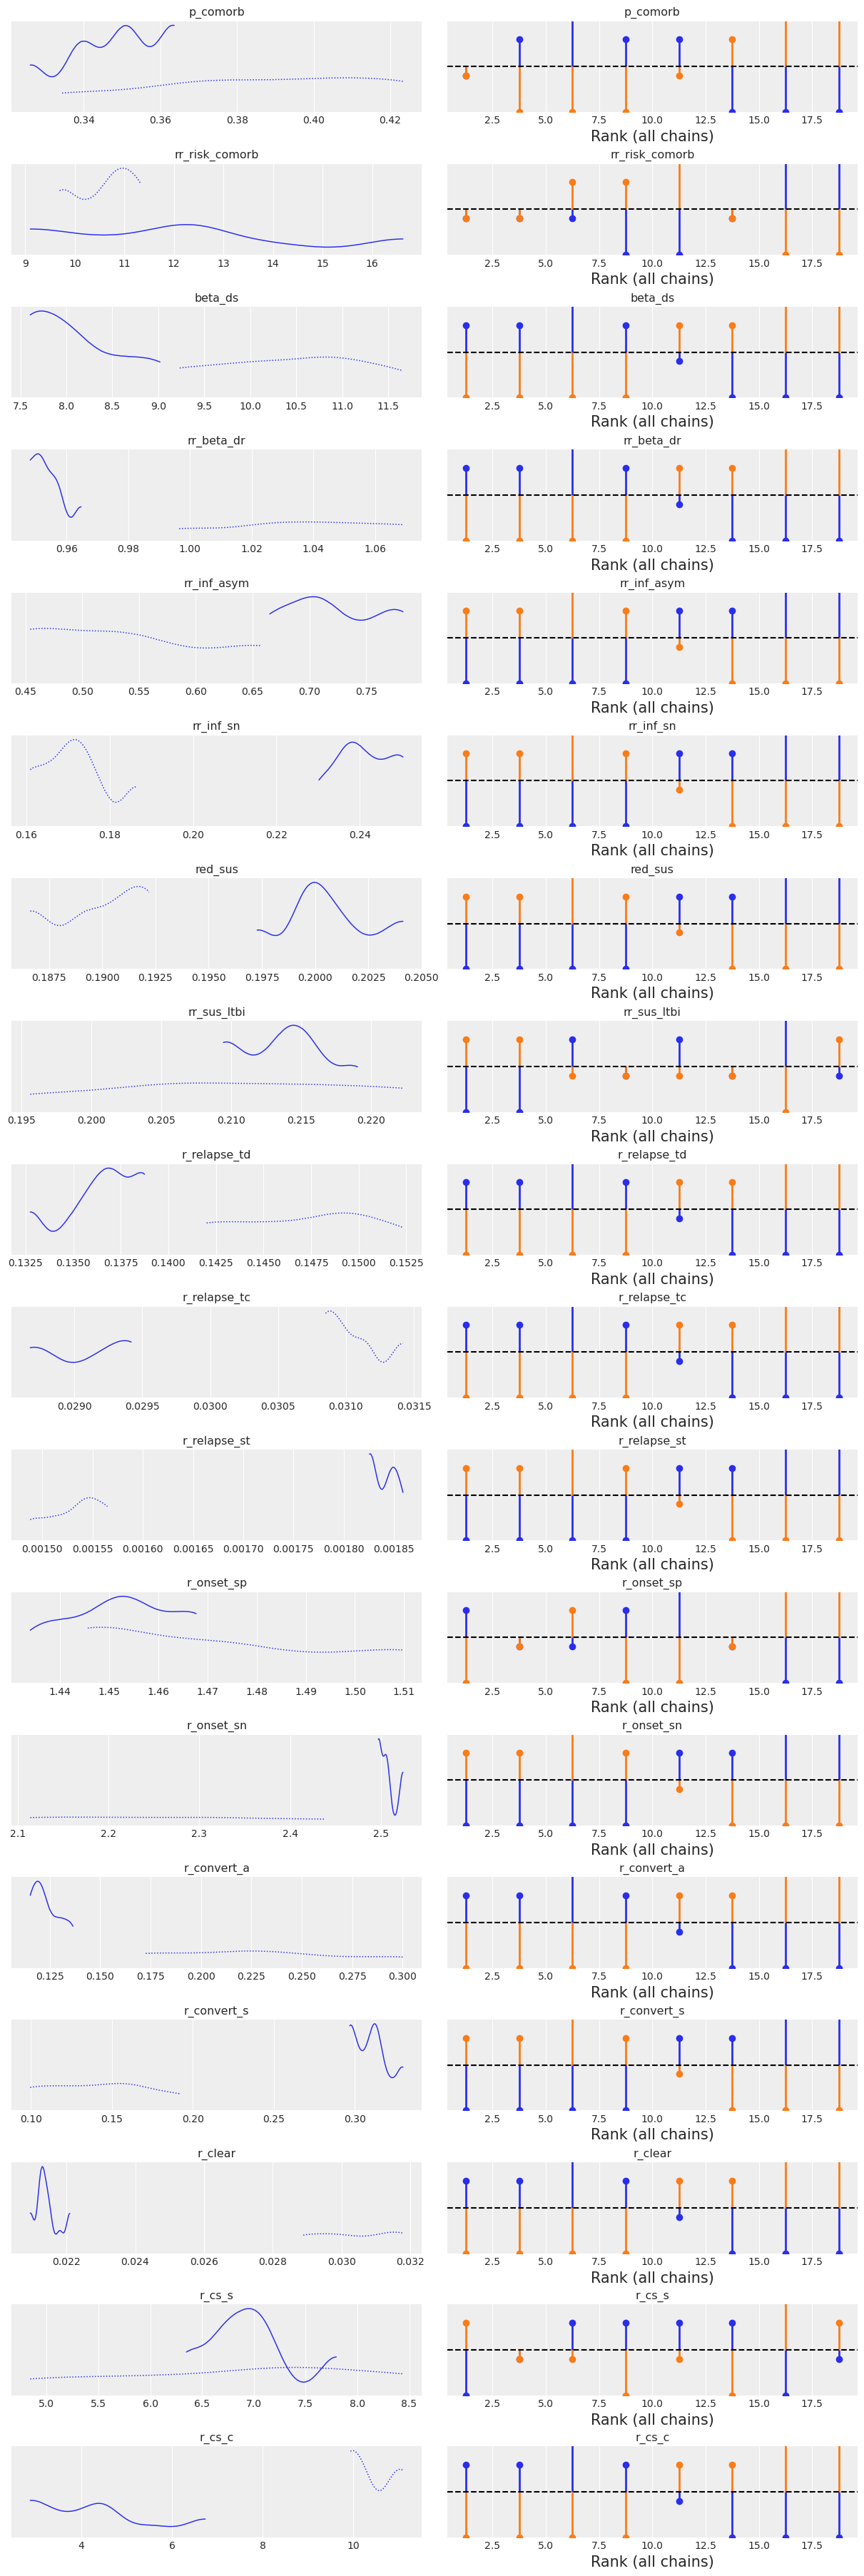

In [11]:
az.plot_trace(fit, kind="rank_vlines")

In [19]:
posts = post_to_particles(fit)
posts = [src.serve(post) for post in posts]

with open(f'{out_path}/Post.json', 'w') as f:
    json.dump(posts, f)
    
    
fit.to_netcdf(f'{out_path}/Post.nc')
ppost.to_netcdf(f'{out_path}/Targets_Post.nc')

'out/dy_free/Targets_Post.nc'